In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../데이터자료/label지정.csv', encoding='CP949')
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10657,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,2016,12,0
10658,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,2017,12,0
10659,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,2018,12,0
10660,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,2019,12,0


In [3]:
df_1 = df.copy()
df_1.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드','year', 'month'],axis=1,inplace=True)
for col in df_1.columns:
    df_1[col] = winsorize(df_1[col], limits= 0.01)
df_1

,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,[제조]매출액총이익률,[제조]매출액순이익률,...,[제조]총자본투자효율,[제조]설비투자효율,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),label
0,56.40,-5.90,-12.89,1.98,-2.02,17.64,-78.28,-1.43,41.83,-8.50,...,12.72,35.86,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,0
1,-8.43,-4.12,-16.43,109.15,75.17,207.08,341.57,7.73,28.34,-40.97,...,0.47,2.89,10.67,1.66,810.10,-710.10,-1161.00,1.71,-7.75,0
2,25.51,16.09,77.05,-2.09,55.10,-18.89,0.00,56.29,38.70,1.45,...,12.51,77.91,289.40,34.29,71.28,28.72,4.23,2.03,0.70,0
3,11.52,74.30,68.15,3.86,0.01,-25.93,-46.64,6.37,37.07,0.69,...,12.16,37.80,132.06,31.04,79.30,20.70,2.24,1.54,3.60,0
4,18.85,-5.37,1.66,-2.64,-4.48,-7.17,0.00,11.04,36.26,-13.50,...,7.63,24.21,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10657,-7.26,-5.61,0.11,1.39,1.39,7.35,-25.71,52.46,5.33,1.51,...,8.84,18.38,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,0
10658,8.12,-0.56,-0.48,0.98,0.83,7.34,-5.19,9.41,5.07,1.33,...,8.54,18.04,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,0
10659,6.87,-0.36,-2.09,-5.89,0.99,-21.19,14.78,-46.09,5.00,1.43,...,9.80,19.56,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,0
10660,-9.35,-7.00,-2.63,11.24,9.31,80.74,249.94,96.40,5.14,5.50,...,18.02,42.99,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,0


In [4]:
df_1 = df_1.drop(['[제조]순운전자본비율',"[제조]유동자산구성비율","[제조]자기자본구성비율"],axis=1)

In [5]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

feature = df_1.drop(columns='label')
target = df_1['label']

#릿지 클래서
ridge = Ridge(alpha = 10)

neg_mse_scores = cross_val_score(ridge, feature, target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(neg_mse_scores,rmse_scores,avg_rmse)

ridge_alphas =[1000,2000,3000,4000,5000]
for alpha in ridge_alphas :
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, feature, target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 떄 5folds 의 평균 RMSE : {1:.10f}' .format(alpha,avg_rmse))

# fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(ridge_alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(feature,target)
    coeff = pd.Series(data=ridge.coef_, index=feature.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
#     axs[pos].set_title(colname)
#     axs[pos].set_xlim(-3,6)
#     sns.barplot(x=coeff.values, y=coeff.index, ax =axs[pos])

# plt.show()


[-0.01202518 -0.01777272 -0.01328077 -0.01728046 -0.01263287] [0.10965936 0.13331438 0.11524221 0.13145515 0.11239602] 0.12041342656516477
alpha 1000 일 떄 5folds 의 평균 RMSE : 0.1204299301
alpha 2000 일 떄 5folds 의 평균 RMSE : 0.1204350571
alpha 3000 일 떄 5folds 의 평균 RMSE : 0.1204368905
alpha 4000 일 떄 5folds 의 평균 RMSE : 0.1204374748
alpha 5000 일 떄 5folds 의 평균 RMSE : 0.1204373004


In [6]:
ridge_alphas =[1000,2000,3000,4000,5000]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:1000,alpha:2000,alpha:3000,alpha:4000,alpha:5000
[제조]총자본회전률,6.099944e-03,3.097514e-03,1.994429e-03,1.431045e-03,1.093856e-03
[제조]순운전자본회전률,2.443372e-03,1.692558e-03,1.242929e-03,9.616316e-04,7.719478e-04
[제조]유동자산회전률,1.809404e-03,1.210431e-03,8.394527e-04,6.004348e-04,4.375618e-04
[제조]비유동자산회전률,1.070682e-03,1.016097e-03,9.142967e-04,8.189151e-04,7.360125e-04
[제조]매출채권회전률,7.324854e-04,7.342406e-04,7.351552e-04,7.352185e-04,7.347118e-04
[제조]총자본사업이익률,6.316209e-04,6.381867e-04,6.381404e-04,6.358034e-04,6.324102e-04
[제조]운전자본회전률,5.678441e-04,4.656181e-04,3.926537e-04,3.390097e-04,2.980436e-04
[제조]1회전기간,3.574245e-04,1.840342e-04,1.240582e-04,9.352680e-05,7.503072e-05
[제조]매입채무회전기간,2.418533e-04,2.397336e-04,2.383235e-04,2.373240e-04,2.365709e-04
[제조]부채비율,1.333391e-04,1.204964e-04,1.126079e-04,1.071640e-04,1.031588e-04


In [32]:

feature = df_1.drop(columns='label')
target = df_1['label']

lasso = Lasso(alpha = 10)
lasso_alphas =[0,0.04]

neg_mse_scores = cross_val_score(lasso, feature, target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(neg_mse_scores,rmse_scores,avg_rmse)

# lasso_alphas =[100,10000,10000]
for alpha in lasso_alphas :
    lasso = Lasso(alpha = alpha)
    neg_mse_scores = cross_val_score(lasso, feature, target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 떄 5folds 의 평균 RMSE : {1:10f}' .format(alpha,avg_rmse))

# fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(lasso_alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(feature,target)
    coeff = pd.Series(data=lasso.coef_, index=feature.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

[-0.01241827 -0.01914632 -0.0142275  -0.01783509 -0.01339871] [0.11143729 0.13837023 0.11927907 0.13354808 0.11575279] 0.12367749091851843


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.318e+01, tolerance: 1.387e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

alpha 0 일 떄 5folds 의 평균 RMSE :   0.120455
alpha 0.04 일 떄 5folds 의 평균 RMSE :   0.120239


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12564\2292876169.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(feature,target)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.575e+01, tolerance: 1.654e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_des

In [ ]:
# alpha 0 일 떄 5folds 의 평균 RMSE :   0.120455
# alpha 1 일 떄 5folds 의 평균 RMSE :   0.122582
# alpha 0.03 일 떄 5folds 의 평균 RMSE :   0.120247
# alpha 0.04 일 떄 5folds 의 평균 RMSE :   0.120239 # 라쏘의 최적 알파값
# alpha 0.05 일 떄 5folds 의 평균 RMSE :   0.120239
# alpha 0.1 일 떄 5folds 의 평균 RMSE :   0.120363

In [33]:
lasso_alphas =[0,0.04]

sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)


,alpha:0,alpha:0.04
[제조]총자본회전률,5.097999e-02,-0.000000e+00
[제조]1회전기간,3.311811e-02,0.000000e+00
[제조]유동자산회전률,3.938736e-03,-0.000000e+00
[제조]운전자본회전률,8.024098e-04,0.000000e+00
[제조]매출채권회전률,7.324313e-04,0.000000e+00
[제조]총자본사업이익률,5.550507e-04,-0.000000e+00
[제조]매입채무회전기간,2.254180e-04,1.496223e-04
[제조]부채비율,1.721970e-04,8.002749e-05
[제조]자기자본증가율,1.081664e-04,4.473107e-06
[제조]매출채권회전기간,8.082302e-05,9.021381e-06


In [34]:
a = coeff_df[coeff_df["alpha:0.04"]!=0]
a = a["alpha:0.04"].abs()
a


[제조]비유동자산증가율        3.056444e-05
[제조]총자본증가율          1.827259e-04
[제조]자기자본증가율         4.473107e-06
[제조]재고자산증가율         2.945223e-05
[제조]매출액순이익률         2.182313e-04
[제조]자기자본순이익률        4.284503e-04
[제조]1주당순이익          9.623715e-06
[제조]1주당매출액          1.675110e-07
[제조]재고자산회전률         1.940352e-06
[제조]매입채무회전기간        1.496223e-04
[제조]재고자산회전기간        5.028401e-05
[제조]매출채권회전기간        9.021381e-06
[제조]유동비율            2.007384e-06
[제조]현금비율            7.945538e-06
[제조]부채비율            8.002749e-05
[제조]자기자본배율          3.382121e-06
[제조]부가가치            5.917368e-08
[제조]총자본투자효율         3.067659e-04
[제조]설비투자효율          4.772361e-07
[제조]기계투자효율          6.111333e-09
[제조]노동소득분배율         6.291902e-05
[제조]자본분배율           6.331899e-05
[제조]이윤분배율           4.691828e-06
[제조]이자보상배율(이자비용)    2.852034e-06
Name: alpha:0.04, dtype: float64

In [51]:

a= pd.DataFrame(a)
a=a.sort_values(["alpha:0.04"],ascending=True)
a


,alpha:0.04
[제조]기계투자효율,6.111333e-09
[제조]부가가치,5.917368e-08
[제조]1주당매출액,1.675110e-07
[제조]설비투자효율,4.772361e-07
[제조]재고자산회전률,1.940352e-06
[제조]유동비율,2.007384e-06
[제조]이자보상배율(이자비용),2.852034e-06
[제조]자기자본배율,3.382121e-06
[제조]자기자본증가율,4.473107e-06
[제조]이윤분배율,4.691828e-06


In [52]:

feature = pd.DataFrame(a)
feature.index 
feature = df[['[제조]매출채권회전기간', 
       '[제조]자본분배율', '[제조]부채비율','[제조]매입채무회전기간', '[제조]총자본증가율', '[제조]매출액순이익률',
       '[제조]자기자본순이익률']]

In [53]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)
# vif 랑 회귀계수 비교해서 vif가 크면서 회귀계수가 작은얘들을 제거

,VIF Factor,features
0,1.862958,[제조]매출채권회전기간
1,1.827198,[제조]매입채무회전기간
2,1.046835,[제조]총자본증가율
3,1.031500,[제조]부채비율
4,1.019672,[제조]매출액순이익률
5,1.001338,[제조]자기자본순이익률
6,1.000437,[제조]자본분배율


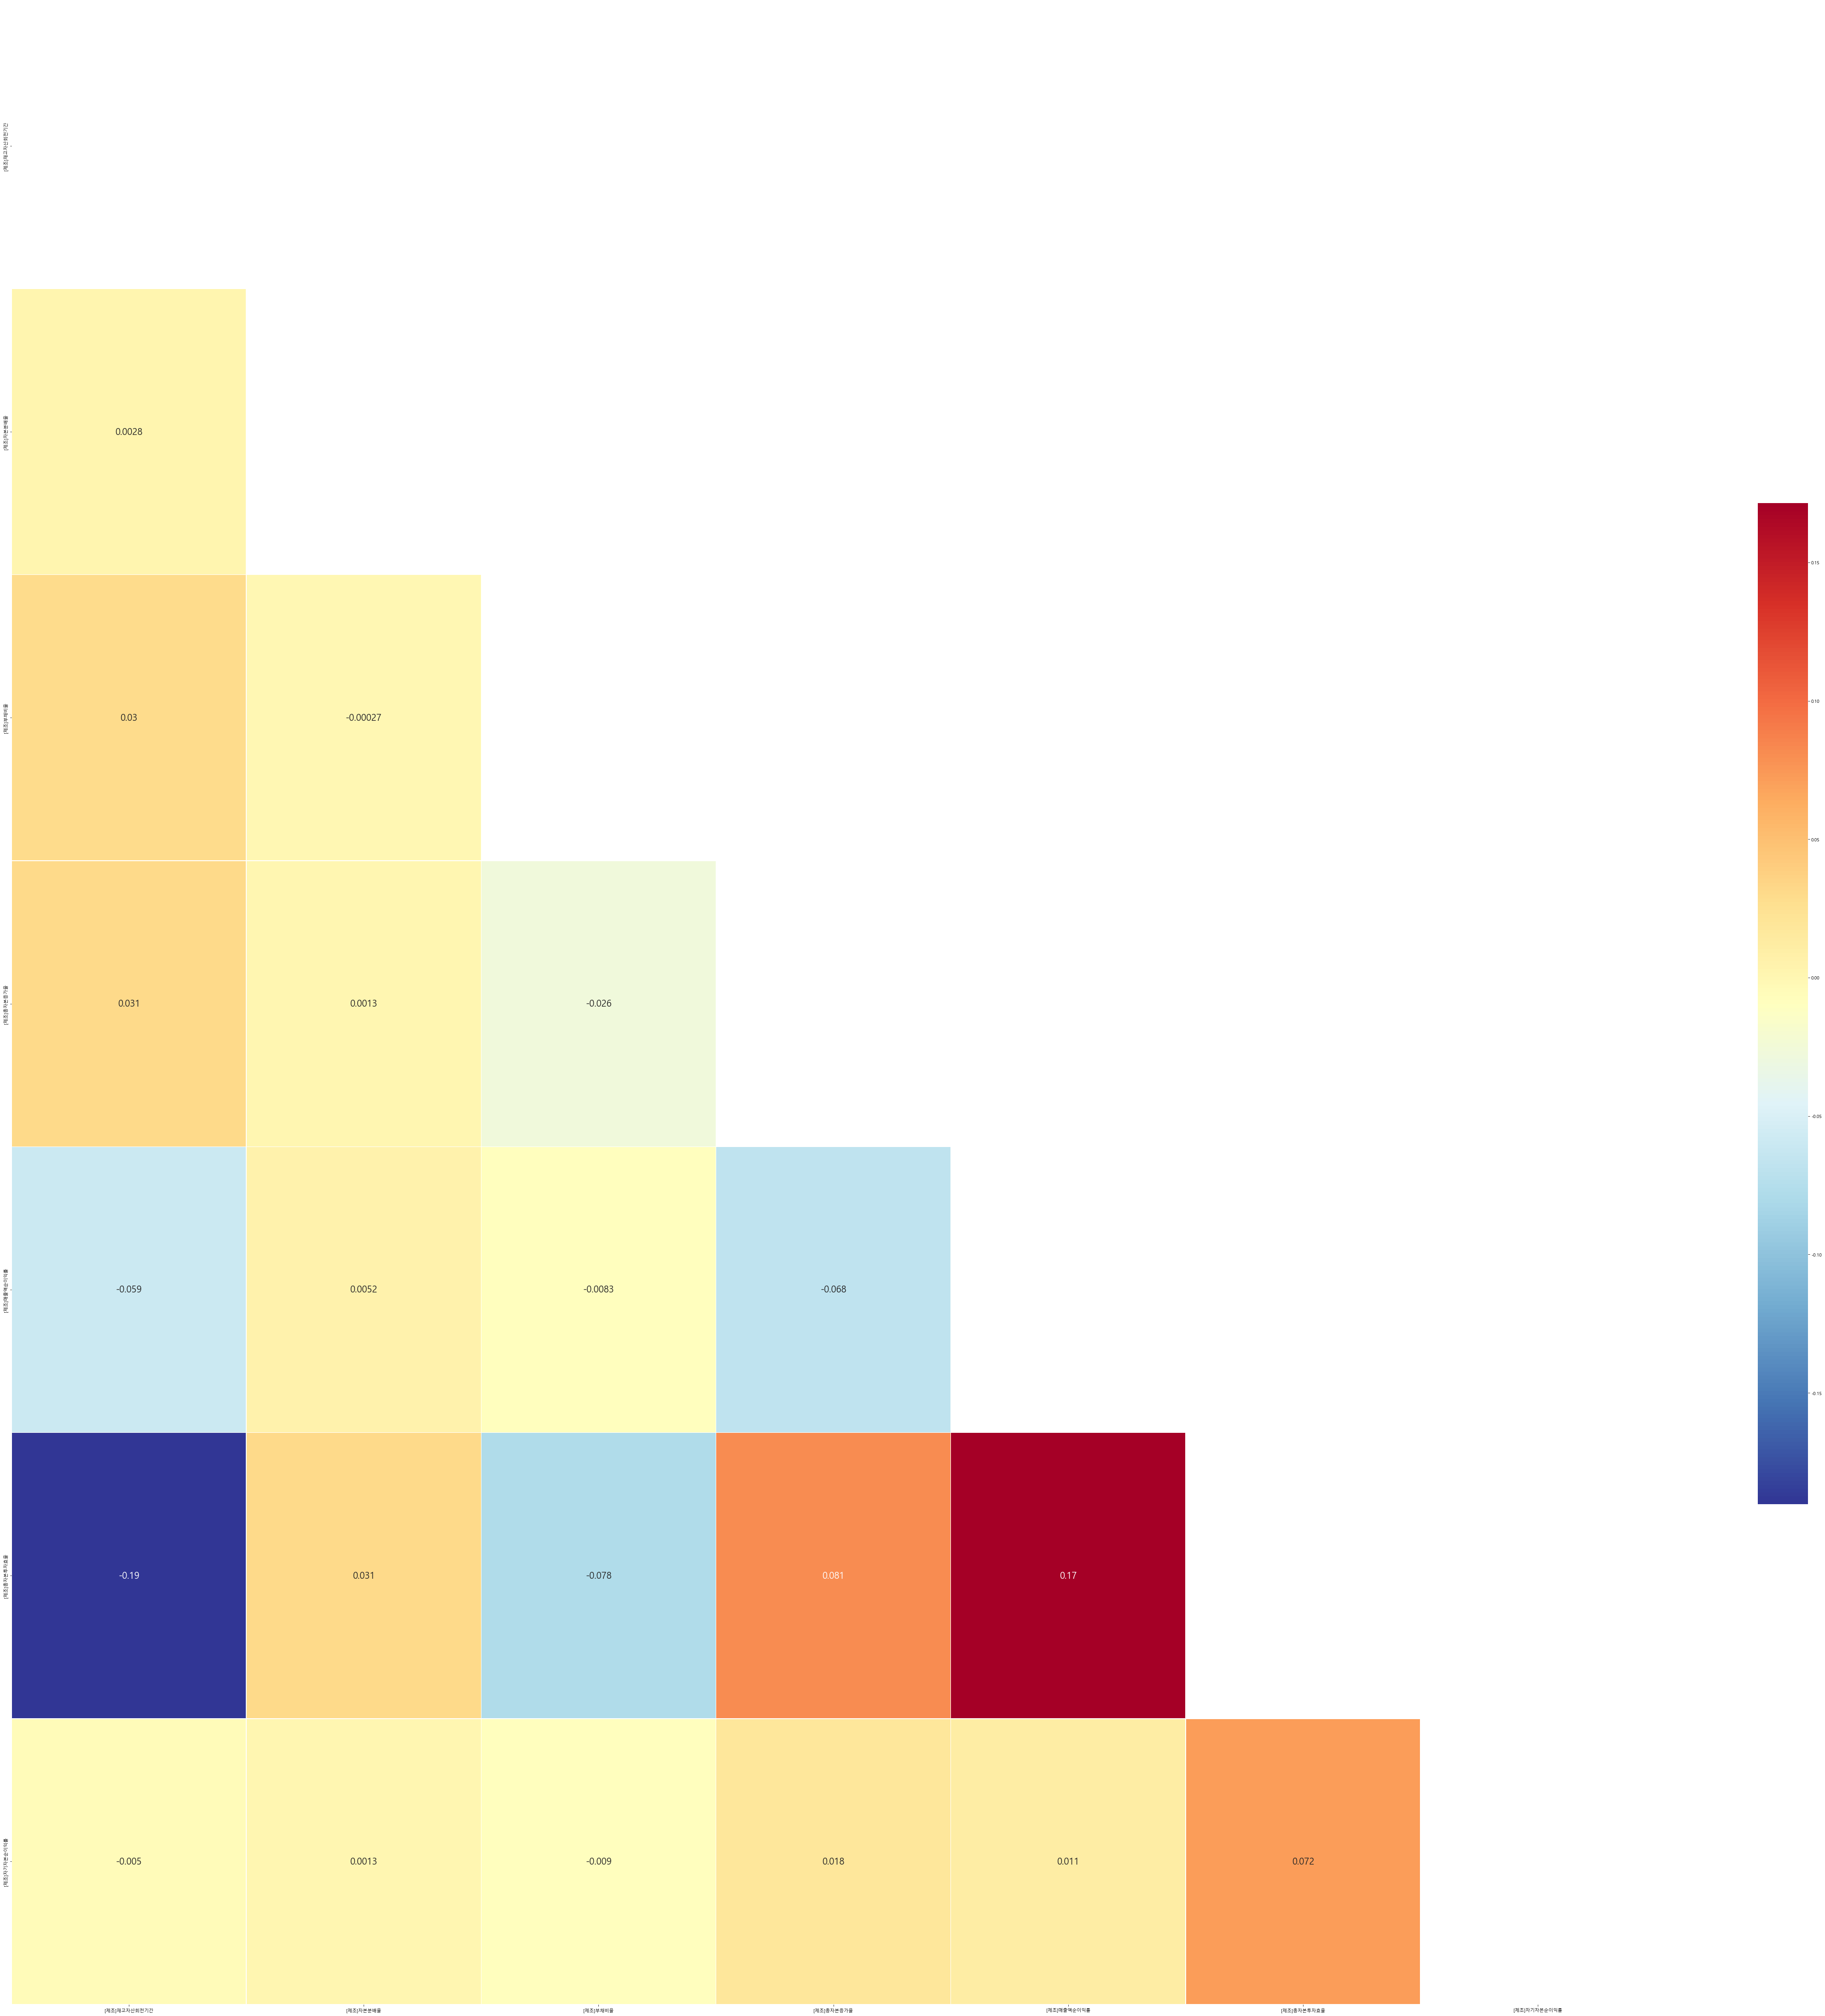

In [68]:
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(feature)

In [56]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet(alpha = 10)
elasticNet_alphas =[0.08,0.09,0.10]

feature = df_1.drop(columns='label')
target = df_1['label']


neg_mse_scores = cross_val_score(elasticNet, feature, target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(neg_mse_scores,rmse_scores,avg_rmse)

for alpha in elasticNet_alphas :
    elasticNet  = ElasticNet(alpha = alpha, l1_ratio=0.5)
    neg_mse_scores = cross_val_score(elasticNet, feature, target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 떄 5folds 의 평균 RMSE : {1:10f}' .format(alpha,avg_rmse))

# fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(elasticNet_alphas):
    
    elasticNet = ElasticNet(alpha = alpha, l1_ratio=0.5)
    elasticNet.fit(feature,target)
    coeff = pd.Series(data=elasticNet.coef_, index=feature.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

[-0.01234956 -0.01908999 -0.01416374 -0.01775253 -0.01332024] [0.11112859 0.13816653 0.1190115  0.13323861 0.11541333] 0.1233917125536496
alpha 0.08 일 떄 5folds 의 평균 RMSE :   0.120239
alpha 0.09 일 떄 5folds 의 평균 RMSE :   0.120238
alpha 0.1 일 떄 5folds 의 평균 RMSE :   0.120239


In [ ]:
# alpha 0.08 일 떄 5folds 의 평균 RMSE :   0.120239
# alpha 0.09 일 떄 5folds 의 평균 RMSE :   0.120238 최적의 알파값
# alpha 0.1 일 떄 5folds 의 평균 RMSE :   0.120239

In [58]:
elasticNet_alphas =[0.08,0.09,0.10] # l1_ratio = 0.5, alphas =0.05 최적

sort_column = 'alpha:'+str(elasticNet_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)


,alpha:0.08,alpha:0.09,alpha:0.1
[제조]매입채무회전기간,1.496157e-04,1.441472e-04,1.383034e-04
[제조]부채비율,8.003188e-05,8.002502e-05,8.024400e-05
[제조]1주당순이익,9.623218e-06,9.464956e-06,9.293120e-06
[제조]매출채권회전기간,9.024405e-06,8.096604e-06,7.222467e-06
[제조]자기자본증가율,4.465322e-06,0.000000e+00,0.000000e+00
[제조]이자보상배율(이자비용),2.851949e-06,2.812124e-06,2.784509e-06
[제조]재고자산회전률,1.940362e-06,1.980654e-06,2.026056e-06
[제조]설비투자효율,4.768701e-07,3.160706e-07,1.535318e-07
[제조]비유동비율,0.000000e+00,0.000000e+00,0.000000e+00
[제조]당좌비율,-0.000000e+00,-0.000000e+00,-0.000000e+00


In [63]:
a = coeff_df[coeff_df["alpha:0.09"]!=0]
a = a["alpha:0.09"].abs()
a

[제조]비유동자산증가율        3.013203e-05
[제조]총자본증가율          1.743803e-04
[제조]재고자산증가율         2.924918e-05
[제조]매출액순이익률         2.222903e-04
[제조]자기자본순이익률        4.303083e-04
[제조]1주당순이익          9.464956e-06
[제조]1주당매출액          1.641730e-07
[제조]재고자산회전률         1.980654e-06
[제조]매입채무회전기간        1.441472e-04
[제조]재고자산회전기간        4.668472e-05
[제조]매출채권회전기간        8.096604e-06
[제조]유동비율            2.275086e-06
[제조]현금비율            7.178322e-06
[제조]부채비율            8.002502e-05
[제조]자기자본배율          3.371164e-06
[제조]부가가치            6.264995e-08
[제조]총자본투자효율         2.807953e-04
[제조]설비투자효율          3.160706e-07
[제조]기계투자효율          6.051807e-09
[제조]노동소득분배율         5.206907e-05
[제조]자본분배율           5.331758e-05
[제조]이윤분배율           3.573910e-06
[제조]이자보상배율(이자비용)    2.812124e-06
Name: alpha:0.09, dtype: float64

In [64]:
a= pd.DataFrame(a)
a=a.sort_values(["alpha:0.09"],ascending=True)
a

,alpha:0.09
[제조]기계투자효율,6.051807e-09
[제조]부가가치,6.264995e-08
[제조]1주당매출액,1.641730e-07
[제조]설비투자효율,3.160706e-07
[제조]재고자산회전률,1.980654e-06
[제조]유동비율,2.275086e-06
[제조]이자보상배율(이자비용),2.812124e-06
[제조]자기자본배율,3.371164e-06
[제조]이윤분배율,3.573910e-06
[제조]현금비율,7.178322e-06


In [65]:
feature = pd.DataFrame(a)
feature.index 
feature = df[['[제조]재고자산회전기간', '[제조]자본분배율', '[제조]부채비율', 
       '[제조]총자본증가율', '[제조]매출액순이익률', '[제조]총자본투자효율', '[제조]자기자본순이익률']]

In [66]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)

,VIF Factor,features
0,1.114019,[제조]총자본투자효율
1,1.103299,[제조]재고자산회전기간
2,1.076726,[제조]총자본증가율
3,1.033468,[제조]매출액순이익률
4,1.015455,[제조]부채비율
5,1.003409,[제조]자기자본순이익률
6,1.000464,[제조]자본분배율


In [67]:
# import matplotlib.pyplot as plt
# import numpy as np              
# from sklearn.metrics import mean_squared_error

# plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
# plt.plot(np.linspace(0,20,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
# plt.xlabel("실제 Price: $Y_i$")
# plt.ylabel("예측 Price : $\hat{Y}_i$")
# plt.legend()
# plt.title("예측된 Price of train set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$), " + f"alpha={alpha_value}")
# plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import mean_squared_error

# plt.scatter(Y_test,Y_pred, label = '(실제값, 예측값)', alpha=1)
# plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
# plt.xlabel("실제 Price: $Y_i$")
# plt.ylabel("예측 Price: $\hat{Y}_i$")
# plt.legend()
# plt.title("예측 Price of test set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$), " + f"alpha={alpha_value}")
# plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error(Y_test,Y_pred) : .4f}')
# plt.show()

In [ ]:
# # 잔차 분석
# resid = Y_pred_train - Y_train

# plt.scatter(Y_pred_train, resid, c='b')
# plt.hlines(y=0, xmin= -10, xmax=50)
# plt.title('Residual plot')
# plt.show()

In [12]:
# 정규성 검정 (귀무가설 : 정규성를 따른다)
from scipy.stats import jarque_bera

statistic, pvalue = jarque_bera(resid)
print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')

검정통계치 :  1405424.09835
p값 :  0.00000


In [13]:
# 등분산 검정 (귀무가설 : 오차항이 등분산성을 따른다)
from statsmodels.stats.api import het_breuschpagan

# Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = het_breuschpagan(resid, X_train)

# 독립변수, featue의 values (endog는 y값)

for i in zip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')

Lag_range multiplier statistic :  866.598
p-value :  0.000
f-value :  20.019
f p-value :  0.000


In [ ]:
from sklearn.linear_model import Lasso

def get_linear_reg_eval(model_name, paramas = None, X_data_n =None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose